# FIFA WORLD CUP 2018 Challenge 
## Predict the Semi_Finalist**   Finalist** and the Winner** of 2018 
## Steps 
###        1: Data Understanding  
###        2: Data Preparation 
###        3: EDA 
###        4: Feature standardization
###        4: Model Building 
###        5: Model Evaluation

In [995]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [996]:
# Importing FiFA results.csv
df = pd.read_csv('results.csv')

In [997]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [998]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39070 entries, 0 to 39069
Data columns (total 9 columns):
date          39070 non-null object
home_team     39070 non-null object
away_team     39070 non-null object
home_score    39070 non-null int64
away_score    39070 non-null int64
tournament    39070 non-null object
city          39070 non-null object
country       39070 non-null object
neutral       39070 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.4+ MB


In [1000]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# extracting month and year from issue_date
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)


In [1001]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [1002]:
#understand the number of tournament played by home_team and away team and compare against each. 
df_home = df[['home_team','home_score']].rename(columns={'home_team':'team_name','home_score':'team_score'})
df_away = df[['away_team','away_score']].rename(columns={'away_team':'team_name','away_score':'team_score'})



In [1003]:
df_home.head()

,team_name,team_score
0,Scotland,0
1,England,4
2,Scotland,2
3,England,2
4,Scotland,3


In [1004]:
df_h = df_home.sort_values(['team_score'],ascending = [False])
df_h.head(5)

,team_name,team_score
23569,Australia,31
10860,Fiji,24
23566,Australia,22
22344,Kuwait,20
23231,Iran,19


In [1005]:
df_a = df_away.sort_values(['team_score'],ascending = [False])
df_a.head(5)

,team_name,team_score
27065,Korea DPR,21
14625,Papua New Guinea,20
12620,Papua New Guinea,19
25416,New Caledonia,18
25456,Vanuatu,18


In [1006]:
#Home scores looks more than away scores let us find mean
by_mean = df[['home_score','away_score']].mean()
by_mean


home_score    1.739724
away_score    1.179754
dtype: float64

In [1007]:
#merge the both home and away to form team and score 
df_team = df_home.append(df_away).reset_index(drop=True)

In [1008]:
df_team.head()

,team_name,team_score
0,Scotland,0
1,England,4
2,Scotland,2
3,England,2
4,Scotland,3


In [1009]:
df_t = df_team.sort_values(['team_score'],ascending = [False])
df_t.head(5)

,team_name,team_score
23569,Australia,31
10860,Fiji,24
23566,Australia,22
66135,Korea DPR,21
53695,Papua New Guinea,20


In [1010]:
df_by_country = df_team.groupby('team_name')['team_score'].agg(['sum','count','mean']).reset_index( )

In [1011]:
df_by_country.head()

,team_name,sum,count,mean
0,Afghanistan,110,103,1.067961
1,Albania,287,316,0.908228
2,Algeria,675,484,1.394628
3,American Samoa,26,42,0.619048
4,Andorra,40,147,0.272109


In [1012]:
df_by_country=df_by_country.rename(columns={'sum':'goal_count','count':'match_count','mean':'goal_avg'})

In [1013]:
df_by_country.head()

,team_name,goal_count,match_count,goal_avg
0,Afghanistan,110,103,1.067961
1,Albania,287,316,0.908228
2,Algeria,675,484,1.394628
3,American Samoa,26,42,0.619048
4,Andorra,40,147,0.272109


In [1014]:
df_gc = df_by_country.sort_values(['goal_count'],ascending = [False])
df_gc.head(5)

,team_name,goal_count,match_count,goal_avg
64,England,2138,978,2.186094
28,Brazil,2088,953,2.190976
78,Germany,2085,931,2.239527
205,Sweden,1977,994,1.988934
94,Hungary,1866,912,2.046053


In [1015]:
df_mc = df_by_country.sort_values(['match_count'],ascending = [False])
df_mc.head(5)

,team_name,goal_count,match_count,goal_avg
205,Sweden,1977,994,1.988934
64,England,2138,978,2.186094
8,Argentina,1780,954,1.865828
28,Brazil,2088,953,2.190976
78,Germany,2085,931,2.239527


In [1016]:
df_ga = df_by_country.sort_values(['goal_avg'],ascending = [False])
df_ga.head(5)

,team_name,goal_count,match_count,goal_avg
150,New Caledonia,543,211,2.573460
209,Tahiti,488,191,2.554974
166,Papua New Guinea,256,102,2.509804
70,Fiji,449,196,2.290816
157,Northern Cyprus,25,11,2.272727


In [1017]:
df_gc_mc_ga = df_by_country.sort_values(['goal_count','match_count','goal_avg'],ascending = [False,False,False])
df_gc_mc_ga.head(5)

,team_name,goal_count,match_count,goal_avg
64,England,2138,978,2.186094
28,Brazil,2088,953,2.190976
78,Germany,2085,931,2.239527
205,Sweden,1977,994,1.988934
94,Hungary,1866,912,2.046053


Text(0.5,1,'Top 10 Goal Frequency Chart')

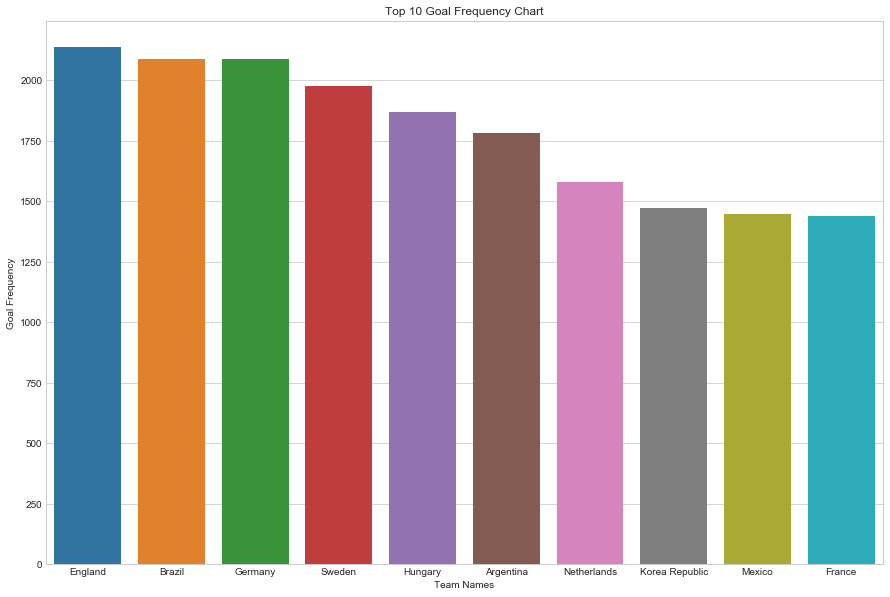

In [1018]:
#Visualize the graphs to see the above same
plt.figure(figsize=(15,10))
# set a seaborn style of your taste
sns.set_style("whitegrid")
plt_data = df_by_country.sort_values(by='goal_count',ascending=False)[:10]
sns.barplot(x='team_name',y='goal_count',data=plt_data)
plt.xlabel('Team Names')
plt.ylabel('Goal Frequency')
plt.title('Top 10 Goal Frequency Chart')

#### England,Brazil,Germany are the top 3 on count of goal frequency

Text(0.5,1,'Top 10 Match Frequency Chart')

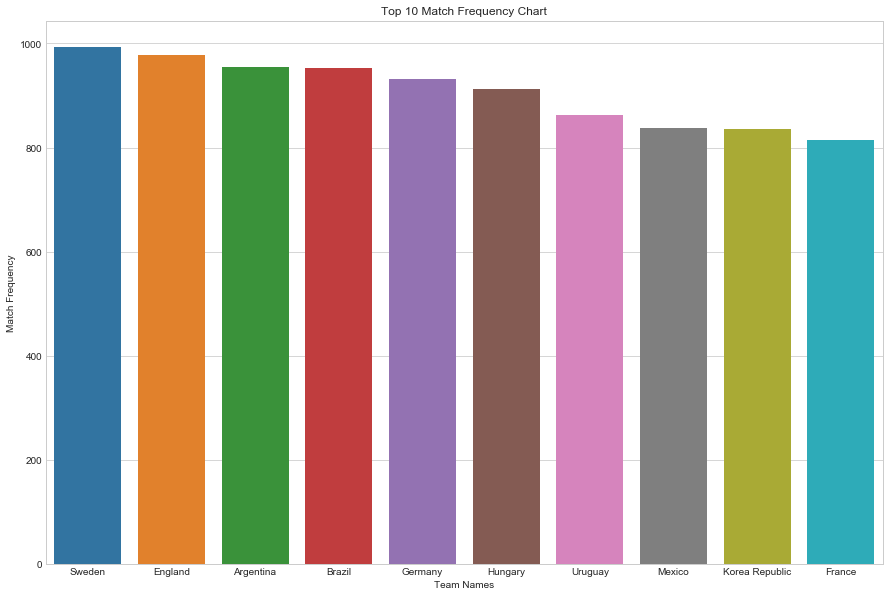

In [1019]:
plt.figure(figsize=(15,10))
plt_data = df_by_country.sort_values(by='match_count',ascending=False)[:10]
sns.barplot(x='team_name',y='match_count',data=plt_data)
plt.xlabel('Team Names')
plt.ylabel('Match Frequency')
plt.title('Top 10 Match Frequency Chart')

#### Sweden,England,Argentina share the top in number of match count

Text(0.5,1,'Top 10 Average Goal Frequency Chart')

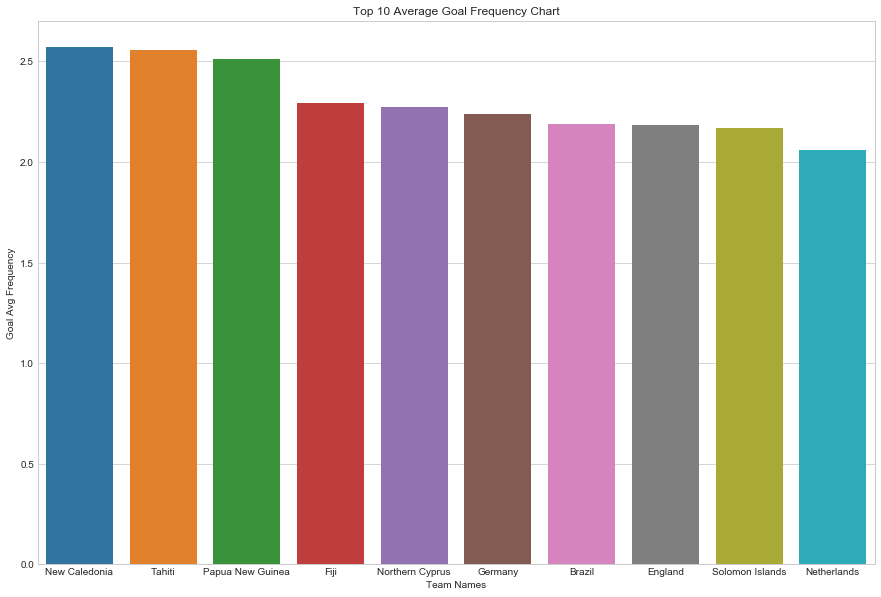

In [1020]:
plt.figure(figsize=(15,10))
plt_data = df_by_country.sort_values(by='goal_avg',ascending=False)[:10]
sns.barplot(x='team_name',y='goal_avg',data=plt_data)
plt.xlabel('Team Names')
plt.ylabel('Goal Avg Frequency')
plt.title('Top 10 Average Goal Frequency Chart')

#### NewCaledonia,Tahiti,paupa new Guinea share the top count in Avg Goal

In [1021]:
df_match=df['tournament'].value_counts()
df_match=df_match[:10]

In [1022]:
df_match

Friendly                                16481
FIFA World Cup qualification             7100
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            856
Copa América                              787
AFC Asian Cup qualification               724
African Cup of Nations                    638
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

In [1023]:
df_tm=df_team['team_name'].value_counts()
df_tm.head()

Sweden       994
England      978
Argentina    954
Brazil       953
Germany      931
Name: team_name, dtype: int64

Text(0.5,1,'Top 10 Matchs')

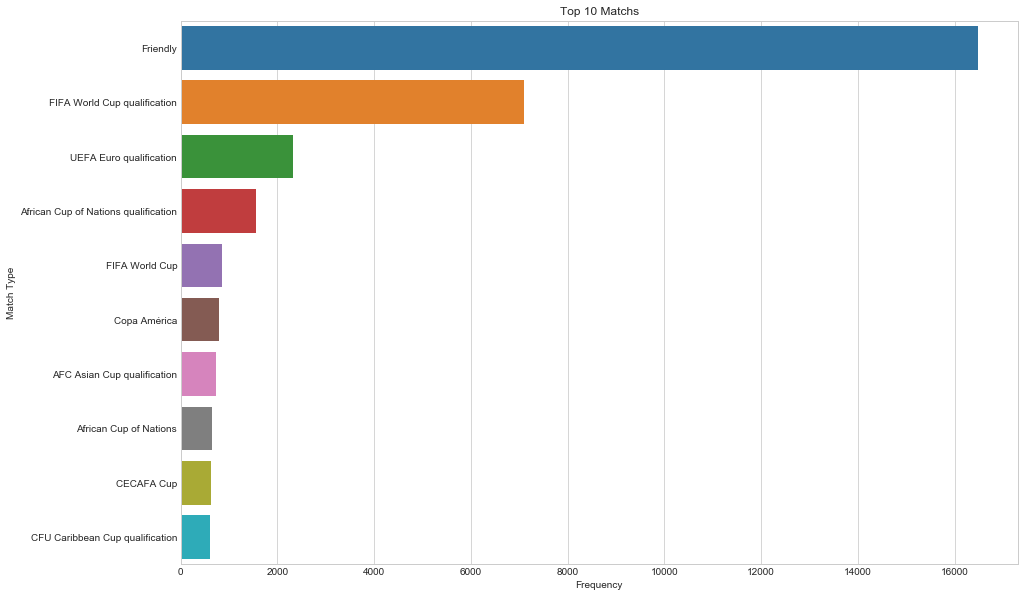

In [1024]:
plt.figure(figsize=(15,10))

sns.barplot(x=df_match.values,y=df_match.index,data=plt_data)
plt.xlabel('Frequency')
plt.ylabel('Match Type')
plt.title('Top 10 Matchs')

In [1025]:
df_by_country.describe()

,goal_count,match_count,goal_avg
count,244.00000,244.000000,244.000000
mean,467.47541,320.245902,1.295249
std,448.77068,247.408987,0.448817
min,0.00000,2.000000,0.000000
25%,121.75000,123.500000,1.028690
50%,310.00000,248.500000,1.300922
75%,684.50000,498.750000,1.609809
max,2138.00000,994.000000,2.573460


# Poisson Distribution (https://en.wikipedia.org/wiki/Poisson_distribution)
#### Is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated {\displaystyle \lambda } \lambda  (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation



In [1026]:
%%html
<img src='1.png',width=200,height=200>

In [1027]:
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

In [1028]:
#Let's see the Poisson distribution will be suitable for our case. 

df_pred = np.column_stack([[poisson.pmf(i,by_mean[j]) for i in range(10)] for j in range(2) ])


In [1029]:
df_pred

array([[1.75568926e-01, 3.07354250e-01],
       [3.05441399e-01, 3.62602494e-01],
       [2.65691801e-01, 2.13890924e-01],
       [1.54076763e-01, 8.41129114e-02],
       [6.70127442e-02, 2.48081420e-02],
       [2.33167302e-02, 5.85350236e-03],
       [6.76077752e-03, 1.15094909e-03],
       [1.68026915e-03, 1.93976731e-04],
       [3.65400480e-04, 2.86056100e-05],
       [7.06328699e-05, 3.74973234e-06]])

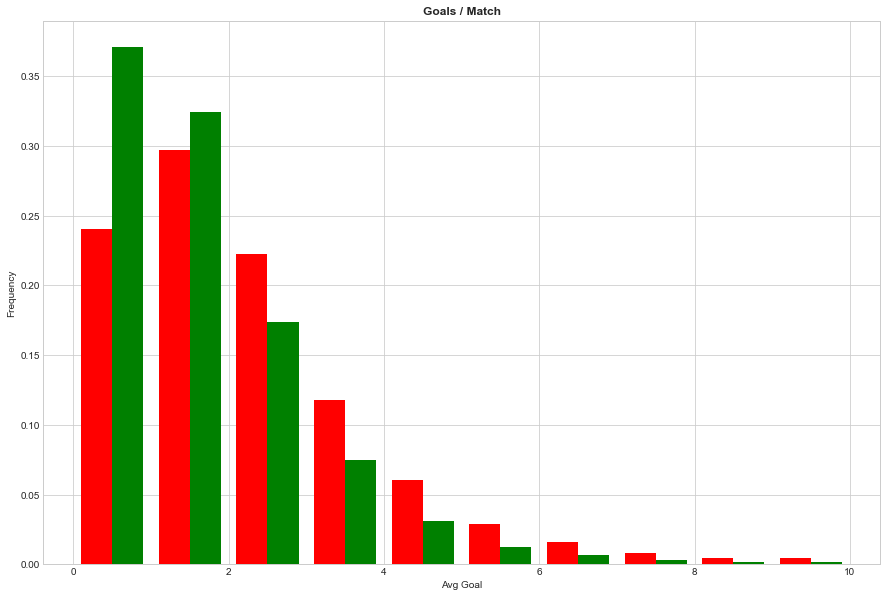

In [1030]:
#plot 
plt.figure(figsize=(15,10))
plt.hist(df[['home_score','away_score']].values,range(11),label =['Home Score','Away Score'], normed=True,color =['red','green'])
plt.xlabel('Avg Goal')
plt.ylabel('Frequency') 
plt.title('Goals / Match',fontweight='bold')
plt.show()

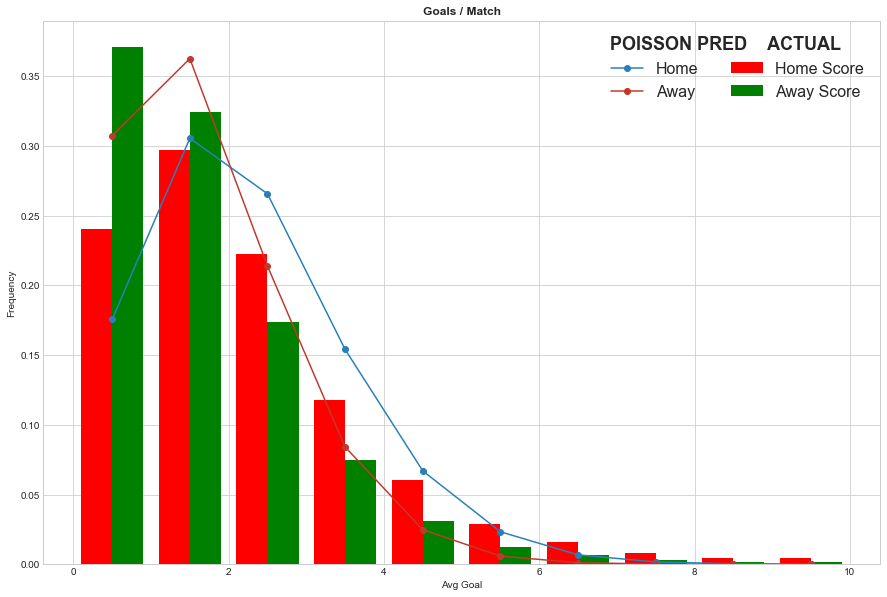

In [1031]:
plt.figure(figsize=(15,10))
plt.hist(df[['home_score','away_score']].values,range(11),label =['Home Score','Away Score'], normed=True, color =['red','green'])
#poisson distribution 
poisson1, = plt.plot([k-0.5 for k in range(1,11)],df_pred[:,0],
                     linestyle='-' , marker='o',label='Home', color = '#2980b9') 

poisson2, = plt.plot([k-0.5 for k in range(1,11)],df_pred[:,1],
                     linestyle='-',marker='o',label='Away', color = '#c0392b')

line = plt.legend(loc='upper right',fontsize=16,ncol=2)
line.set_title("POISSON PRED    ACTUAL     ", prop = {'size': '18','weight':'bold'})


plt.xlabel('Avg Goal')
plt.ylabel('Frequency') 
plt.title('Goals / Match',fontweight='bold')
plt.show()

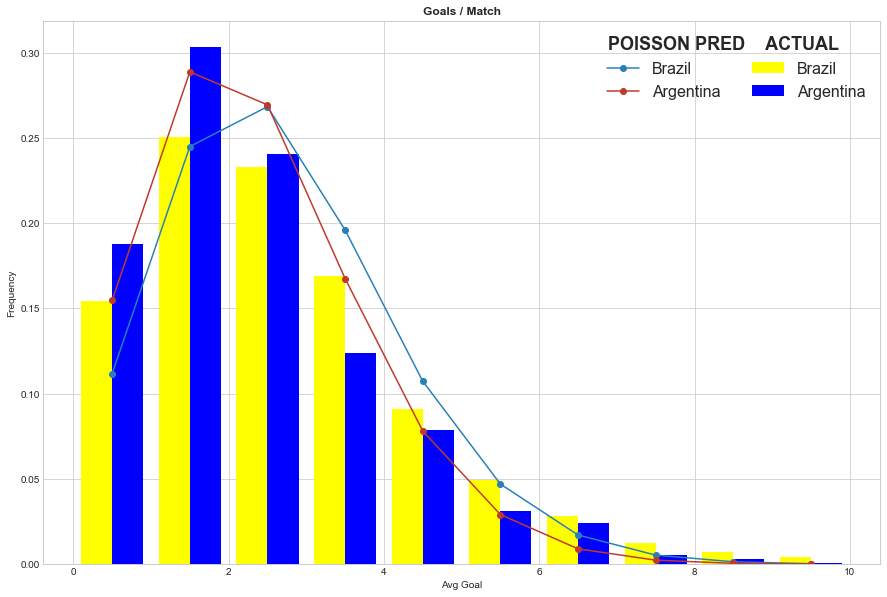

In [1032]:
team1,team2 = "Brazil","Argentina"

df_team1= df_team[df_team['team_name'] == team1]
df_team2= df_team[df_team['team_name'] == team2] 

mean_team1 = df_team1['team_score'].mean()
mean_team2 = df_team2['team_score'].mean() 

df_pred_team1 = [poisson.pmf(i,mean_team1) for i in range(10)]
df_pred_team2 = [poisson.pmf(i,mean_team2) for i in range(10)] 

plt.figure(figsize=(15,10))

plt.hist([df_team1['team_score'].values,df_team2['team_score'].values], range(11),
        label = [team1,team2],normed=True,color=['yellow','blue'])

#Pred. 
pois1, = plt.plot([k-0.5 for k in range(1,11)], df_pred_team1,
                 linestyle='-' , marker='o',label=team1, color = '#2980b9') 
pois2, = plt.plot([k-0.5 for k in range(1,11)], df_pred_team2,
                 linestyle='-' , marker='o',label=team2, color = '#c0392b') 
line = plt.legend(loc='upper right',fontsize=16,ncol=2) 
line.set_title("POISSON PRED    ACTUAL     ", prop = {'size': '18','weight':'bold'})


plt.xlabel('Avg Goal')
plt.ylabel('Frequency') 
plt.title('Goals / Match',fontweight='bold')
plt.show()


##### So Number of goals scored by each team can be approximately predicted by a poisson distribution. 
##### Let us start building the model assuming this Poisson distribution will provide a good regression model for this prediction

In [1033]:
#weight is the feature standardaization

def weg_df_match(df_match):
    if 'Cup' in df_match or 'Euro' in df_match:
        return 1
    else:
        return 100
    
df.loc[:,'weight'] = df['tournament'].apply(weg_df_match)
df.loc[:,'weight'] = 1/((2019 - df['year'])*df['weight'])

df_model_data = pd.concat([df[['home_team','away_team','home_score','weight']]
                           .rename(columns={'home_team':'team_name','away_team':'opponent_team'
                                           ,'home_score':'goals'}),
                            df[['away_team','home_team','away_score','weight']]
                           .rename(columns={'away_team': 'team_name','home_team': 'opponent_team'
                                            ,'away_score':'goals'})
                          ])



In [1034]:
df_model_data.head()

,team_name,opponent_team,goals,weight
0,Scotland,England,0,0.000068
1,England,Scotland,4,0.000068
2,Scotland,England,2,0.000069
3,England,Scotland,2,0.000069
4,Scotland,England,3,0.000070


In [1035]:
# mapping labels to 0 and 1
df_model_data['team_name'].map({'Iran':'Spain', 'Spain': 'Iran','Morocco':'Portugal','Portugal':'Morocco','Nigeria':'Argentina','Argentina': 'Nigeria','Serbia':'Brazil','Brazil':'Serbia','Germany':'Mexico','Mexico':'Germany','Tunisia':'Belgium'})
df_model_data['opponent_team'].map({'Iran':'Spain', 'Spain': 'Iran','Morocco':'Portugal','Portugal':'Morocco','Nigeria':'Argentina','Argentina': 'Nigeria','Serbia':'Brazil','Brazil':'Serbia','Germany':'Mexico','Mexico':'Germany','Tunisia':'Belgium'})
df_model_data.head()

,team_name,opponent_team,goals,weight
0,Scotland,England,0,0.000068
1,England,Scotland,4,0.000068
2,Scotland,England,2,0.000069
3,England,Scotland,2,0.000069
4,Scotland,England,3,0.000070


In [1053]:
df_model_data['team_name'].map({'Colombia':'Portugal'})
df_model_data['opponent_team'].map({'Colombia':'Portugal'})
df_model_data.head()

,team_name,opponent_team,goals,weight
0,Scotland,England,0,0.000068
1,England,Scotland,4,0.000068
2,Scotland,England,2,0.000069
3,England,Scotland,2,0.000069
4,Scotland,England,3,0.000070


In [1054]:
#pred poisson model 

poisson_model = smf.glm(formula="goals ~ team_name + opponent_team", data= df_model_data,
                       family=sm.families.Poisson(),freq_weights=df_model_data['weight'].values).fit()

In [1055]:
#poisson_model.fit().summary()

In [1056]:
# Their are 3 probabilities criteria for each match. ==> Team1 win, team2 win or match draw

def get_proba_match(model,team1,team2,max_goals=10):
    team1_goal_avg = model.predict(pd.DataFrame(data={'team_name': team1,'opponent_team':team2},index=[1])).values[0]
    
    team2_goal_avg = model.predict(pd.DataFrame(data={'team_name': team2,'opponent_team':team1},index=[1])).values[0]
    
    #return team1_goal_avg,team2_goal_avg
    team_pred = [[poisson.pmf(i,team_avg) for i in range(0,max_goals+1)] for team_avg in [team1_goal_avg,team2_goal_avg]]
    
    match = np.outer(np.array(team_pred[0]),np.array(team_pred[1])) 
    
    #3 possible probabilities 
    team1_win = np.sum(np.tril(match,-1))
    draw = np.sum(np.diag(match)) 
    team2_win = np.sum(np.triu(match,-1)) 
    result_proba = [team1_win,draw,team2_win] 
    
    result_proba = np.array(result_proba)/np.array(result_proba).sum(axis=0,keepdims=1)
    team_pred[0] = np.array(team_pred[0])/np.array(team_pred[0]).sum(axis=0,keepdims=1)
    team_pred[1] = np.array(team_pred[1])/np.array(team_pred[1]).sum(axis=0,keepdims=1)
    
    #print(result_proba, '-', [np.array(team_pred[0]),np.array(team_pred[1])
    return result_proba,[np.array(team_pred[0]),np.array(team_pred[1])]
    

In [1057]:
# function to find winner 
def get_result(model,team1,team2,elimination=False,max_draw=50,max_goals=10):
    probability,score_proba = get_proba_match(model,team1,team2,max_goals) 
    
    result_series = pd.Series([np.random.choice([team1,'draw',team2],p=probability)
                        for i in range(0,max_draw)]).value_counts()
    #if not elimation then it may not be only draw 
    result =result_series.index[0] if not elimination or(elimination and result_series.index[0]!='draw') else result_series.index[1]
    
    if(result != 'draw'):
        win,loose =(0,1) if result == team1 else (1,0)
        score_proba[win] = score_proba[win][1:]/score_proba[win][1:].sum(axis=0,keepdims=1)
        winner_score = pd.Series([np.random.choice(range(1,max_goals+1), p=score_proba[win]) for i in range(0,max_draw)]).value_counts().index[0]
        score_proba[loose] = score_proba[loose][:winner_score]/score_proba[loose][:winner_score].sum(axis=0,keepdims=1)
        looser_score = pd.Series([np.random.choice(range(0,winner_score), p=score_proba[loose]) for i in range(0,max_draw)]).value_counts().index[0]
        score = [winner_score,looser_score]
    else:
        score = np.repeat(pd.Series([np.random.choice(range(0,max_goals+1),p=score_proba[0]) for i in range(0,max_draw)]).value_counts().index[0],2)
    looser = team2 if result == team1 else team1 if result != 'draw' else 'draw'
    return result,looser,score

In [1058]:
print(get_result(poisson_model, 'Argentina','Germany',max_goals=10))
print(get_result(poisson_model, 'Portugal','Spain',elimination=True))
print(get_result(poisson_model, 'Brazil', 'Vatican', max_goals=20))
print(get_result(poisson_model, 'England', 'Morocco'))

('Germany', 'Argentina', [2, 1])
('Spain', 'Portugal', [1, 0])
('Brazil', 'Vatican', [16, 0])
('Morocco', 'England', [1, 0])


In [1059]:
groupA = ['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay']
groupB = ['Portugal', 'Spain', 'Morocco', 'Iran']
groupC = ['France', 'Australia', 'Peru', 'Denmark']
groupD = ['Argentina', 'Iceland', 'Croatia', 'Nigeria']
groupE = ['Brazil', 'Switzerland', 'Costa Rica', 'Serbia']
groupF = ['Germany', 'Mexico', 'Sweden', 'Korea Republic']
groupG = ['Belgium', 'Panama', 'Tunisia', 'England']
groupH = ['Poland', 'Senegal', 'Colombia', 'Japan']
groups = [groupA, groupB, groupC, groupD, groupE, groupF, groupG, groupH]

In [1060]:
def get_group(model, group):
    rank = pd.DataFrame({'points':[0,0,0,0], 'diff':[0,0,0,0], 'goals':[0,0,0,0]}, index=group)
    for team1, team2 in itertools.combinations(group, 2):
        result, looser, score = get_result(model, team1, team2)
        if result == 'draw':
            rank.loc[[team1, team2], 'points'] += 1
            rank.loc[[team1, team2], 'goals'] += score[0]
        else:
            rank.loc[result, 'points'] += 3
            rank.loc[result, 'goals'] += score[0]
            rank.loc[looser, 'goals'] += score[1]
            rank.loc[result, 'diff'] += score[0]-score[1]
            rank.loc[looser, 'diff'] -= score[0]-score[1]
            
    return rank.sort_values(by=['points','diff','goals'], ascending=False)


In [1061]:
def final(model, groups_result):
    round_16 = []
    quarter_finals = []
    semi_finals = []
    
    # 16
    for i in range(0, 8, 2):
        round_16.append(get_result(model, groups_result[i].index[0], groups_result[i+1].index[1], elimination=True))
        round_16.append(get_result(model, groups_result[i].index[1], groups_result[i+1].index[0], elimination=True))
    
    # QUATER FINALS
    quarter_finals.append(get_result(model, round_16[0][0], round_16[2][0], elimination=True))
    quarter_finals.append(get_result(model, round_16[1][0], round_16[3][0], elimination=True))
    quarter_finals.append(get_result(model, round_16[4][0], round_16[6][0], elimination=True))
    quarter_finals.append(get_result(model, round_16[5][0], round_16[7][0], elimination=True))
    
    # SEMI FINALS
    semi_finals.append(get_result(model, quarter_finals[0][0], quarter_finals[2][0], elimination=True))
    semi_finals.append(get_result(model, quarter_finals[1][0], quarter_finals[3][0], elimination=True))
    
    # 3RD PLACE MATCH
    p_final = get_result(model, semi_finals[0][1], semi_finals[1][1], elimination=True)
    
    # FINAL
    final = get_result(model, semi_finals[0][0], semi_finals[1][0], elimination=True)
    
    return round_16, quarter_finals, semi_finals, p_final, final


In [1062]:
groups_ranking = []
for group in groups:
    groups_ranking.append(get_group(poisson_model, group))
    
round_16, quarter_finals, semi_finals, p_final, final = final(poisson_model, groups_ranking)

In [1063]:
# Print the results.

In [1064]:
print(round_16)

[('Spain', 'Uruguay', [1, 0]), ('Iran', 'Egypt', [1, 0]), ('Croatia', 'Denmark', [1, 0]), ('Nigeria', 'Peru', [1, 0]), ('Germany', 'Serbia', [1, 0]), ('Brazil', 'Sweden', [2, 1]), ('Colombia', 'England', [2, 1]), ('Belgium', 'Japan', [1, 0])]


In [1065]:
print(quarter_finals)

[('Croatia', 'Spain', [1, 0]), ('Nigeria', 'Iran', [1, 0]), ('Germany', 'Colombia', [1, 0]), ('Brazil', 'Belgium', [1, 0])]


In [1066]:
print(semi_finals)

[('Germany', 'Croatia', [1, 0]), ('Brazil', 'Nigeria', [3, 0])]


In [1067]:
print(p_final)

('Croatia', 'Nigeria', [1, 0])


In [1068]:
print(final)

('Brazil', 'Germany', [1, 0])


In [1069]:
for group_rank in groups_ranking:
    display(group_rank)

,diff,goals,points
Uruguay,3,3,9
Egypt,1,2,6
Russia,0,2,3
Saudi Arabia,-4,0,0


,diff,goals,points
Iran,3,3,9
Spain,1,2,6
Morocco,-1,1,3
Portugal,-3,0,0


,diff,goals,points
Denmark,3,4,9
Peru,1,2,6
Australia,-1,2,3
France,-3,0,0


,diff,goals,points
Nigeria,3,3,9
Croatia,1,2,6
Argentina,-1,1,3
Iceland,-3,0,0


,diff,goals,points
Serbia,3,3,9
Brazil,1,3,3
Switzerland,-1,1,3
Costa Rica,-3,1,3


,diff,goals,points
Sweden,3,3,9
Germany,-1,1,3
Mexico,-1,1,3
Korea Republic,-1,1,3


,diff,goals,points
England,4,4,9
Belgium,1,2,6
Tunisia,-1,1,3
Panama,-4,0,0


,diff,goals,points
Japan,3,3,9
Colombia,1,2,6
Senegal,-1,1,3
Poland,-3,0,0
